## 第4章：形態素解析
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](https://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
! wget https://nlp100.github.io/data/neko.txt

--2022-03-28 19:50:19--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2022-03-28 19:50:19 (20.0 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
ls

neko.txt  sample_data/


In [3]:
# 準備
! apt install mecab libmecab-dev mecab-ipadic-utf8
! pip install mecab-python3
! pip install unidic-lite
! pip install fugashi
! pip install ipadic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [4]:
! mecab neko.txt -o neko.txt.mecab
print("表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音\nEOS:End Of Statement\n---------------------------\n")
! head -n 30 neko.txt.mecab

表層形	品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
EOS:End Of Statement
---------------------------

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント


### 30.形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [5]:
import re

morphemes = list()
sentences = list()
with open("neko.txt.mecab", "r") as f:
    for line in f.readlines():
        if line != "EOS\n":
            morpheme_list = re.split("[\t,]", line)
            if morpheme_list[0] == "\n" or morpheme_list[0] == "":
                continue
            else:
                morpheme_dict = {"surface":morpheme_list[0], "base":morpheme_list[7], "pos":morpheme_list[1], "pos1":morpheme_list[2]}
                morphemes.append(morpheme_dict)
        else:
            sentences.append(morphemes)
            morphemes = list()

for morpheme in sentences[7]:
    print(morpheme)

{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': 'ここ', 'base': 'ここ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '始め', 'base': '始める', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'て', 'base': 'て', 'pos': '助詞', 'pos1': '接続助詞'}
{'surface': '人間', 'base': '人間', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'という', 'base': 'という', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'もの', 'base': 'もの', 'pos': '名詞', 'pos1': '非自立'}
{'surface': 'を', 'base': 'を', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '見', 'base': '見る', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [6]:
verbs = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verbs.add(morpheme["surface"])

for i, verb in enumerate(list(verbs)[:10]):
    print(i, verb)

0 折ら
1 撚
2 緩め
3 下ら
4 敗れ
5 降りよ
6 聞か
7 ひねくっ
8 隠れる
9 歩い


### 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [7]:
verb_bases = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verb_bases.add(morpheme["base"])

for i, base in enumerate(list(verb_bases)[:10]):
    print(i, base)

0 擦り切れる
1 犯す
2 盛る
3 隠れる
4 変じる
5 差し引く
6 娶る
7 つかれる
8 担ぐ
9 衝く


### 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [8]:
connection_by_no = set()

for sentence in sentences:
    for i in range(1, len(sentence)-1):
        if sentence[i-1]["pos"] == "名詞" and sentence[i]["surface"] == "の" and sentence[i+1]["pos"] == "名詞":
            connection_by_no.add(sentence[i-1]["surface"] + sentence[i]["surface"] + sentence[i+1]["surface"])

for i, component in enumerate(list(connection_by_no)[:10]):
    print(i, component)

0 髯の芽生え
1 様の頭
2 供の寝床
3 筆の穂
4 元来の骨格
5 遊戯の下
6 鷲の了見
7 退校の処分
8 粛の態
9 洗髪の根本


### 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [9]:
sequential_nouns = set()

for sentence in sentences:
    articulation = ""
    num = 0
    for morpheme in sentence:
        if morpheme["pos"] == "名詞":
            articulation += morpheme["surface"]
            num += 1
        elif num >= 2:
            sequential_nouns.add(articulation)
            articulation = ""
            num = 0
        else:
            articulation = ""
            num = 0
    if num >= 2:
        sequential_nouns.add(articulation)

for i, articulation in enumerate(list(sequential_nouns)[:10]):
    print(i, articulation)

0 勇猛心
1 群鶴館
2 ほろろ
3 ガラス球
4 玄妙不思議
5 是非見物
6 大変目
7 投ぐる
8 ぴかついて黒縮緬
9 せんだって僕


### 35. 単語の頻出頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
word_frequency = dict()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "記号":
            break
        if morpheme["surface"] in word_frequency:
            word_frequency[morpheme["surface"]] += 1
        else:
            word_frequency[morpheme["surface"]] = 1

word_frequency_rank = sorted(word_frequency.items(), key=lambda x:x[1], reverse=True)

for i, word in enumerate(word_frequency_rank[:10]):
    print(i, word)

0 ('の', 3989)
1 ('は', 3072)
2 ('て', 2889)
3 ('に', 2726)
4 ('を', 2437)
5 ('が', 2332)
6 ('と', 1965)
7 ('で', 1799)
8 ('た', 1444)
9 ('も', 1038)


### 36. 頻出上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [11]:
! pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 7.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f4b2e80c185719558391399f2e3575749474206cb27bce777733bb21d36b5f34
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


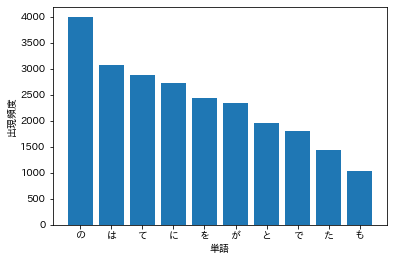

In [12]:
import matplotlib.pyplot as plt
import japanize_matplotlib

words = [key_value[0] for key_value in word_frequency_rank[:10]]
counts = [key_value[1] for key_value in word_frequency_rank[:10]]

plt.bar(words, counts)
plt.xlabel("単語")
plt.ylabel("出現頻度")
plt.show()

### 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

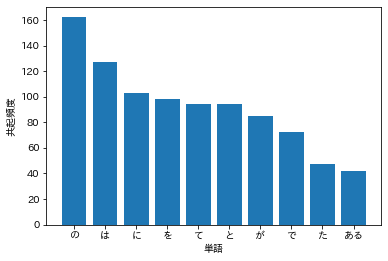

In [13]:
CoOccurFreq_cat = dict()

for sentence in sentences:
    if "猫" in [word["surface"] for word in sentence]:
        for morpheme in sentence:
            if morpheme["pos"] == "記号":
                break
            if morpheme["surface"] in CoOccurFreq_cat:
                CoOccurFreq_cat[morpheme["surface"]] += 1
            else:
                CoOccurFreq_cat[morpheme["surface"]] = 1

CoOccurFreq_cat["猫"] = -1
CoOccurFreq_cat_rank = sorted(CoOccurFreq_cat.items(), key=lambda x:x[1], reverse=True)

words = [key_value[0] for key_value in CoOccurFreq_cat_rank[:10]]
counts = [key_value[1] for key_value in CoOccurFreq_cat_rank[:10]]

plt.bar(words, counts)
plt.xlabel("単語")
plt.ylabel("共起頻度")
plt.show()

### 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

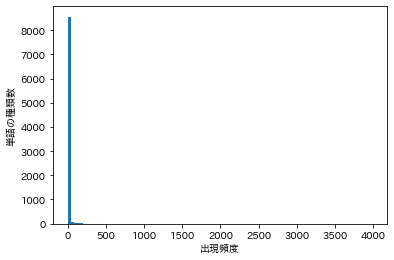

In [14]:
plt.hist(word_frequency.values(), bins=100)
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

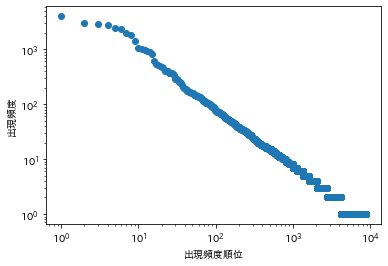

In [15]:
ranks = [rank+1 for rank in range(len(word_frequency))]
counts = [key_value[1] for key_value in word_frequency_rank]
plt.scatter(ranks, counts)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.show()